# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [97]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Images <a class="anchor" id="loading"></a>

In [ ]:
img1 = mpimg.imread('data/image.jpg')
plt.imshow(img1)
print(type(img1))

<class 'numpy.ndarray'>


Look at the shape of this array:

In [ ]:
img1.shape

(400, 700, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

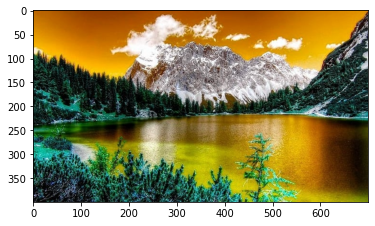

In [ ]:
img2 = cv2.imread('data/image.jpg')
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB). 

Let's fix that

AxesImage(54,36;334.8x217.44)


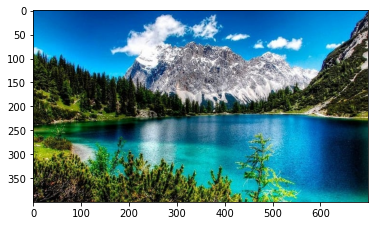

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


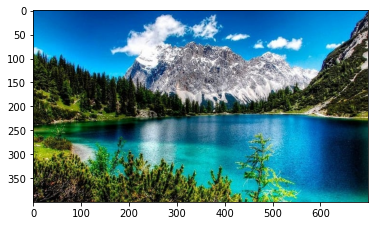

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('data/image.jpg')
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [ ]:
img3 = np.array(img3)
img3.shape

(400, 700, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

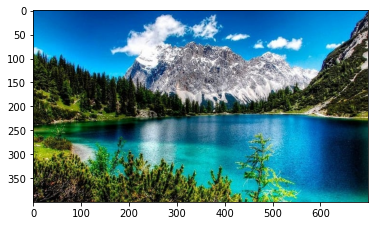

In [ ]:
# Save the image
np.save('data/img.npy', img3)

# Load the image
img3 = np.load('data/img.npy')

plt.imshow(img3)

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it. 

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 700 x 400
New size: 200 x 200


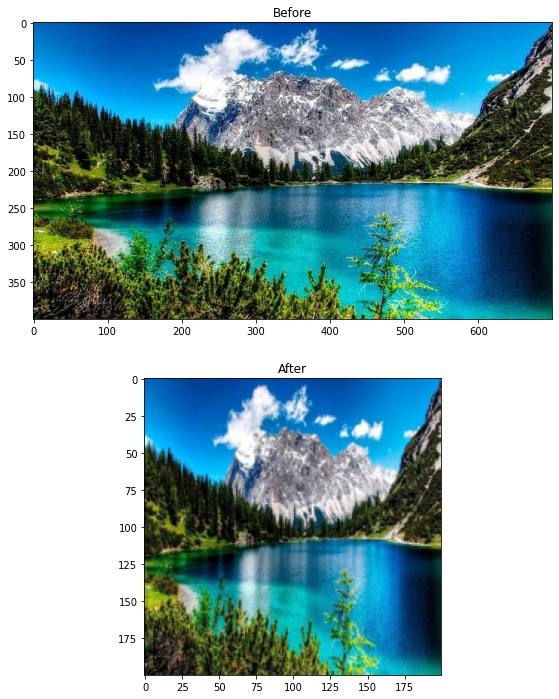

In [ ]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 700 x 400
Scaled size: 200 x 114
New size: 200 x 200


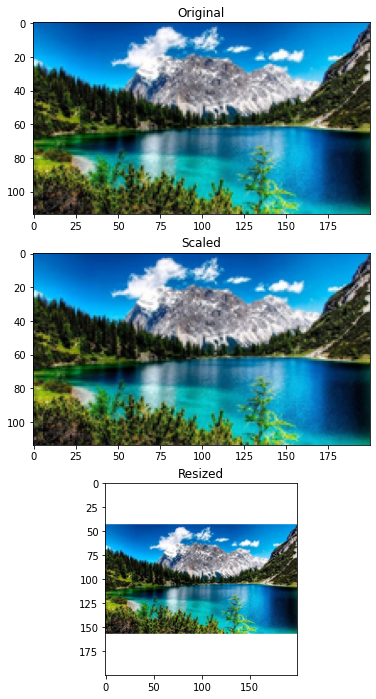

In [ ]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## Negative Images <a class="anchor" id="negative"></a>

In [ ]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

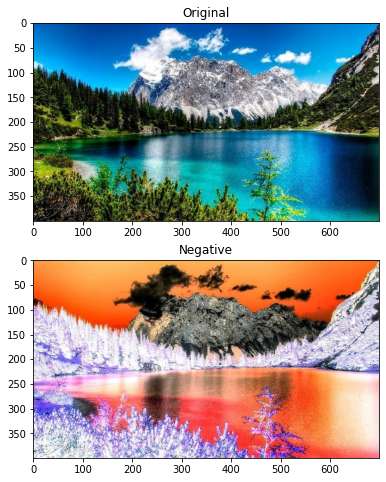

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [ ]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

C:\Users\ivanr\AppData\Local\Temp\ipykernel_14972\418958946.py:6: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(orig_img + 1))


Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

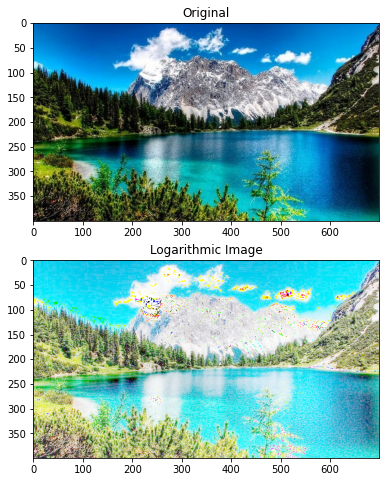

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

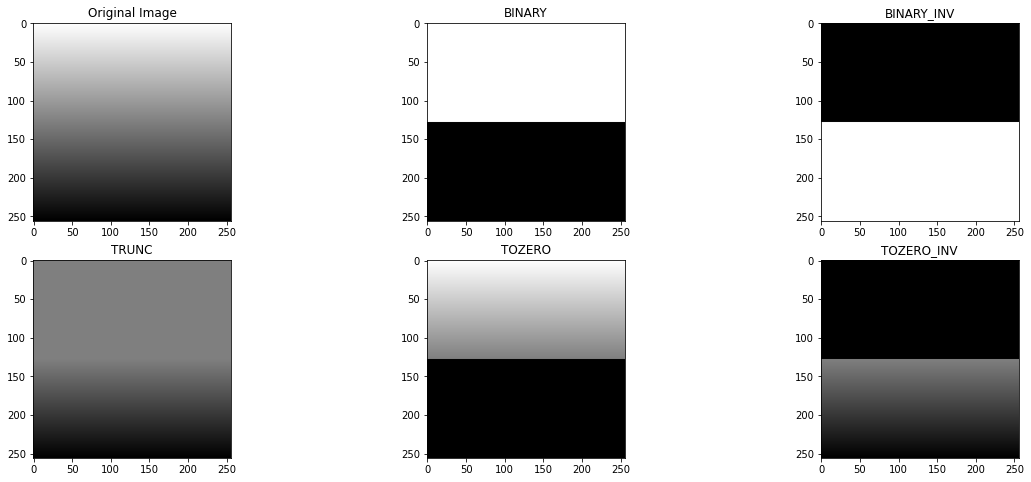

In [ ]:
orig_img = cv2.imread('data/linear_gradient.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

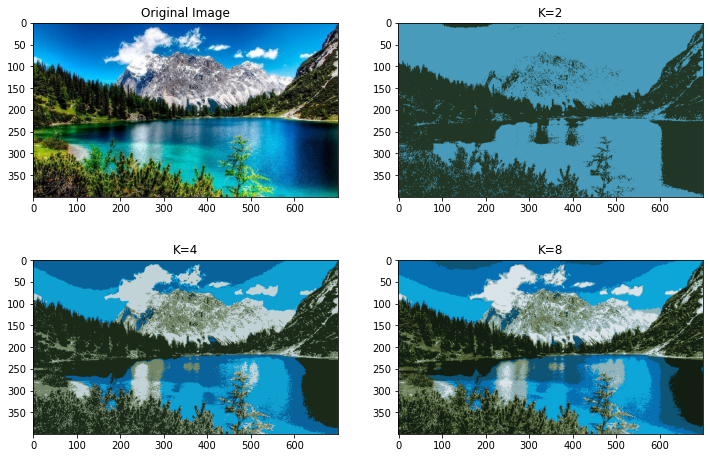

In [ ]:
orig_img = cv2.imread('data/image.jpg')

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
   
   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

# **Reducción de Ruido**

In [171]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

<class 'numpy.ndarray'>


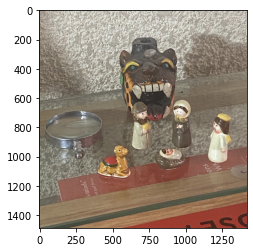

In [172]:
imagen1 = mpimg.imread('/content/Jaguar.jpg')
imagen = mpimg.imread('/content/Jaguar.jpg')
plt.imshow(imagen1)
print(type(imagen1))

<class 'numpy.ndarray'>


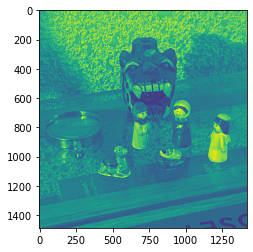

In [173]:
imagen_gris = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)
plt.imshow(imagen_gris)
print(type(imagen_gris))

Ruido Sal y Pimienta

<class 'numpy.ndarray'>


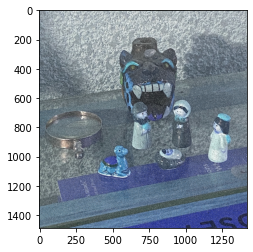

In [174]:
def pepper_and_salt(imagen1,percentage):
    num=int(percentage*imagen1.shape[0]*imagen1.shape[1]) # Número de puntos de ruido de sal y pimienta
    random.randint(0, imagen1.shape[0])
    imagen2=imagen1.copy()
    for i in range(num):
        X=random.randint(0,imagen2.shape[0]-1)# Un número entero aleatorio desde 0 hasta la longitud de la imagen, porque es un intervalo cerrado, -1
        Y=random.randint(0,imagen2.shape[1]-1)
        if random.randint(0,1) ==0: # Probabilidad en blanco y negro 55 abierto
            imagen2[X,Y] = (255,255,255)#blanco
        else:
            imagen2[X,Y] =(0,0,0)#negro
    return imagen2
imagen1=cv2.imread('/content/Jaguar.jpg')
imagen2 = pepper_and_salt(imagen1,0.10)# 4 por ciento de ruido de sal y pimienta
plt.imshow(imagen1)
print
plt.imshow(imagen2)
print(type(imagen2))




<class 'numpy.ndarray'>


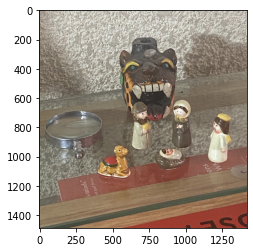

In [175]:
plt.imshow(imagen)
print(type(imagen))

Filtrado de media

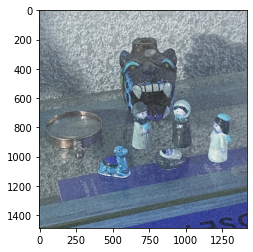

In [176]:
img_media=cv2.blur(imagen2,(3,3)) #Filtrado media
plt.imshow(img_media)

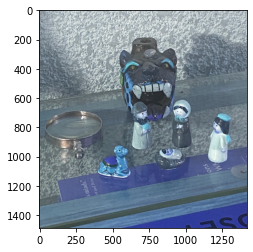

In [177]:
img_mediana = cv2.medianBlur(imagen2,3) #Filtrado mediana
plt.imshow(img_mediana)

Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.


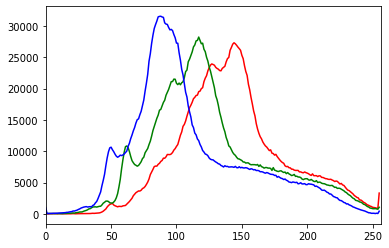

In [178]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([imagen], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.show()

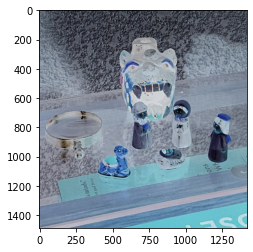

In [180]:
imagen_inv = 1 - imagen 

plt.imshow(imagen_inv)
plt.show() 

## **Histograma**

In [202]:
from skimage.exposure import histogram as imhist
from pylab import * 

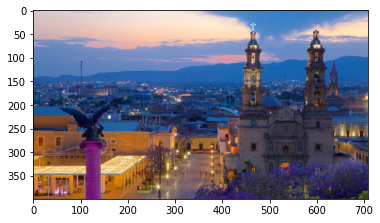

In [203]:
Aguas = imread('/content/Aguas.jpeg')
plt.imshow(Aguas)
plt.show() 

In [204]:
hist, bin_centers = imhist(Aguas)

<ipython-input-204-8655de0dad7c>:1: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = imhist(Aguas)


Text(0, 0.5, '# pixeles')

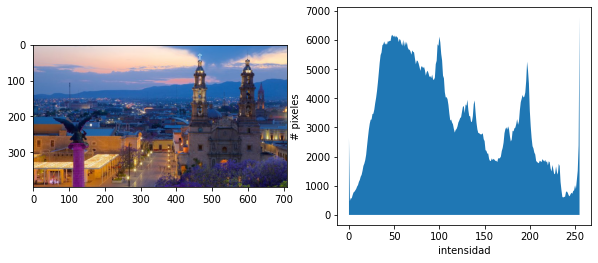

In [205]:
# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(Aguas, cmap="gray")

# Mostar histograma con relleno
ax_hist.fill_between(bin_centers, hist)
ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')


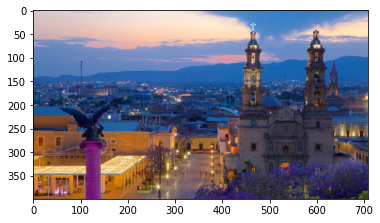

In [206]:
Antonio = imread('/content/Antonio.jpeg')
plt.imshow(Aguas)
plt.show() 

In [207]:
R = Antonio[...,0] # Red
G = Antonio[...,1] # Green
B = Antonio[...,2] # Blue

# Hallar histograma para cada uno
hist_R, bin_centers_R = imhist(R)
hist_G, bin_centers_G = imhist(G)
hist_B, bin_centers_B = imhist(B)

Text(0, 0.5, '# pixeles')

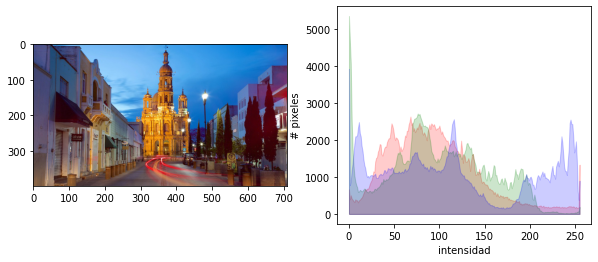

In [208]:
# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(Antonio, cmap="gray")

# Mostar histograma en el segundo lienzo
# alpha para habiltar transparencia
# color para especificar el color
ax_hist.fill_between(bin_centers_R, hist_R, alpha=0.2, color="red")
ax_hist.fill_between(bin_centers_G, hist_G, alpha=0.2, color="green")
ax_hist.fill_between(bin_centers_B, hist_B, alpha=0.2, color="blue")

ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')

## **Transformaciones de Intensidad**

In [209]:
def imadjust(F,range_in=(0,1),range_out=(0,1),gamma=1):
    G = (((F - range_in[0]) / (range_in[1] - range_in[0])) ** gamma) * (range_out[1] - range_out[0]) + range_out[0]
    return G

In [210]:
# Negativo
negativo = imadjust(Antonio, (0, 1), (1, 0))

In [211]:
brillo_alto = imadjust(Antonio, gamma=0.3) # Brillo Alto
brillo_bajo = imadjust(Antonio, gamma=5.0) # Brillo Bajo

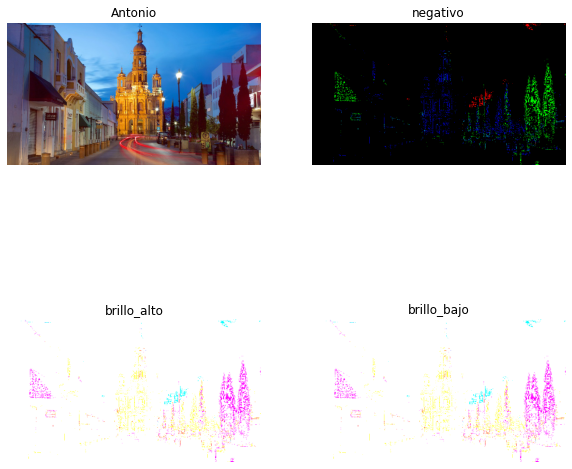

In [212]:
# Mostrar imágenes
_, ((ax0, ax1), (ax2, ax3)) = subplots(2, 2, figsize=(10, 10))

ax0.imshow(Antonio, cmap="gray")
ax0.set_title("Antonio")
ax0.set_axis_off()

ax1.imshow(negativo, cmap="gray")
ax1.set_title("negativo")
ax1.set_axis_off()

ax2.imshow(brillo_alto, cmap="gray")
ax2.set_title("brillo_alto")
ax2.set_axis_off()

ax3.imshow(brillo_bajo, cmap="gray")
ax3.set_title("brillo_bajo")
ax3.set_axis_off()

## **Substracción**

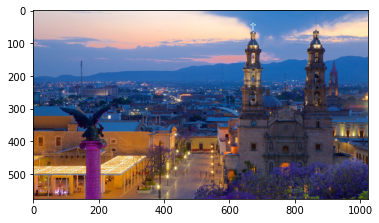

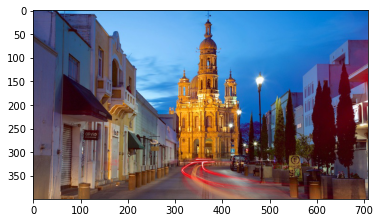

In [213]:
import cv2
Aguas = mpimg.imread('/content/Aguas.jpeg')
plt.imshow(Jaguar)
plt.show() 

Antonio = mpimg.imread('/content/Antonio.jpeg')
plt.imshow(Antonio)
plt.show() 

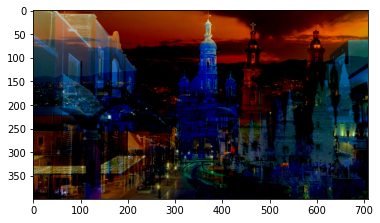

In [214]:
imageSub = cv2.subtract(Aguas,Antonio)

plt.imshow(imageSub)
plt.show() 

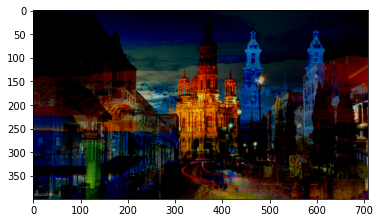

In [216]:
imageSub = cv2.subtract(Antonio,Aguas)

plt.imshow(imageSub)
plt.show() 